# Linear Regression Practice

Adapted from http://www.ritchieng.com/machine-learning-linear-regression/

## 1. Reading Data using Panda

In [1]:
# conventional way to import pandas
import pandas as pd

In [2]:
# read CSV file directly from a URL and save the results
# use .read_csv method and simply pass in the name of the files (local and through a url)
# to find out more about this method, click on the url and press shift + tab (twice)
# we set the index_col=0
data = pd.read_csv( 'http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0 )

# display the first 5 rows
#data.head()
#data['TV'].head()
print( data['TV'] )

_x_tv = []

for e in data['TV'] :
    _x_tv.append( e )
    
#print( _x_tv )

1      230.1
2       44.5
3       17.2
4      151.5
5      180.8
6        8.7
7       57.5
8      120.2
9        8.6
10     199.8
11      66.1
12     214.7
13      23.8
14      97.5
15     204.1
16     195.4
17      67.8
18     281.4
19      69.2
20     147.3
21     218.4
22     237.4
23      13.2
24     228.3
25      62.3
26     262.9
27     142.9
28     240.1
29     248.8
30      70.6
       ...  
171     50.0
172    164.5
173     19.6
174    168.4
175    222.4
176    276.9
177    248.4
178    170.2
179    276.7
180    165.6
181    156.6
182    218.5
183     56.2
184    287.6
185    253.8
186    205.0
187    139.5
188    191.1
189    286.0
190     18.7
191     39.5
192     75.5
193     17.2
194    166.8
195    149.7
196     38.2
197     94.2
198    177.0
199    283.6
200    232.1
Name: TV, Length: 200, dtype: float64


In [3]:
# display the last 5 rows
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
# check the shape of the DataFrame (rows, columns)
# there are 200 rows x 4 columns
data.shape

(200, 4)

What are the features?

- **TV**: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio**: advertising dollars spent on Radio
- **Newspaper**: advertising dollars spent on Newspaper
What is the response?

- **Sales**: sales of a single product in a given market (in thousands of items)

What else do we know?

Because the response variable is continuous, this is a **regression problem**.
There are 200 observations (represented by the rows), and each observation is a single market.


## 2. Visualizing Data

- Seaborn: Python library for statistical data visualization built on top of Matplotlib
- Anaconda users: run conda install seaborn from the command line

In [5]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

/home/wilsan/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


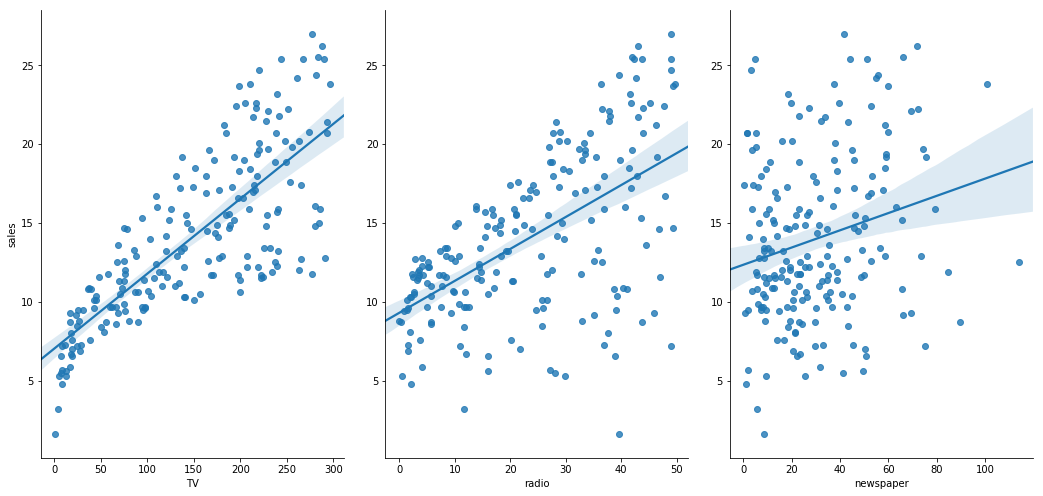

In [6]:
# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

Linear regression
- Strong relationship between TV ads and sales
- Weak relationship between Radio ads and sales
- Very weak to no relationship between Newspaper ads and sales

## 3. Computing Linear Regression (Scikit-learn)

## Form of linear regression
$$y=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$$
- $y$  is the response
- $\theta_0$  is the intercept
- In this case:
$$y=\theta_0+\theta_1\times TV+\theta_2\times Radio+\theta_3 \times Newspaper$$


scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays
However, pandas is built on top of NumPy
Thus, X can be a pandas DataFrame (matrix) and y can be a pandas Series (vector)

In [7]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the original DataFrame
X = pd.DataFrame(data, columns=feature_cols) 

# equivalent command to do this in one line using double square brackets
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
X = data[['TV', 'radio', 'newspaper']]
# print the first 5 rows
X.head()
#X['TV'].head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [8]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [9]:
# select a Series from the DataFrame
y = data['sales']

# equivalent command that works if there are no spaces in the column name
# you can select the Sales as an attribute of the DataFrame
#y = data.Sales (python 2)

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

## Splitting X and y into training and testing sets

In [10]:
# import  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


## Linear Regression

In [12]:
# import model
from sklearn.linear_model import LinearRegression
import numpy as np

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

## Excercise 1 
# Try your own linear regression algorithm 

# Generate the data in numpy array form
def dataframe2nparray( pDataframe, pFeature ) :
    _data = []
    for e in pDataframe[pFeature] :
        _data.append( e )
    
    return _data

_x_tv        = dataframe2nparray( X_train, 'TV' )
_x_radio     = dataframe2nparray( X_train, 'radio' )
_x_newspaper = dataframe2nparray( X_train, 'newspaper' )

_x_tv_t        = dataframe2nparray( X_test, 'TV' )
_x_radio_t     = dataframe2nparray( X_test, 'radio' )
_x_newspaper_t = dataframe2nparray( X_test, 'newspaper' )

# Sanity checking
assert( len( _x_tv ) == len( _x_radio ) )
assert( len( _x_radio ) == len( _x_newspaper ) )

# Generate the training examples
_X = []
for q in range( len( _x_tv ) ) :
    _X.append( ( 1, _x_tv[q], _x_radio[q], _x_newspaper[q] ) )

_X_t = []
for q in range( len( _x_tv_t ) ) :
    _X_t.append( ( 1, _x_tv_t[q], _x_radio_t[q], _x_newspaper_t[q] ) )
    
#print( '_X: ', _X )

_Y = []
for e in y_train :
    _Y.append( e )
    
_Y_t = []
for e in y_test :
    _Y_t.append( e )
    
#print( '_Y: ', _Y )

# Use linear regression
_NUM_ITERS = 10000
_ALPHA = 0.0025
_nSamples = len( _X )

_w = 0.1 * np.random.rand( 4 )
#_w = np.zeros( 4 )

for i in range( _NUM_ITERS ) :
    
    for n in range( _nSamples ) :
        _dw = np.zeros( 4 )
        
        # first compute the predicted value
        _x = _X[n]
        _y  = _Y[n]
        _yp = _w[0] * _x[0] + _w[1] * _x[1] + _w[2] * _x[2] + _w[3] * _x[3]
        
        for q in range( len( _w ) ) :
            _dw[q] += ( _yp - _y ) * _x[q]
            
        _dw = _dw / _nSamples
        #_len = np.sqrt( _dw[0]**2 + _dw[1]**2 + _dw[2]**2 + _dw[3]**2 )
        #_dw[0] = _dw[0] / _len
        #_dw[1] = _dw[1] / _len
        #_dw[2] = _dw[2] / _len
        #_dw[3] = _dw[3] / _len
        _w = _w - _ALPHA * _dw
        
print( '_w: ', _w )


_w:  [ 2.77019658  0.04426695  0.17621077  0.01226365]


## Interpreting model coefficients

In [13]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [14]:
# pair the feature names with the coefficients
# hard to remember the order, we so we python's zip function to pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

$$ y= 2.88 +0.0466 \times TV+0.179 \times radio + 0.00345 \times Newspaper $$
How do we interpret the TV coefficient (0.0466)?
For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.


## Making Predictions

In [15]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

def predict( weights, x ) :
    _res = 0
    for q in range( len( x ) ) :
        _res += weights[q] * x[q]
    return _res
    
_y_pred_w = []
for q in range( len( _X_t ) ) :
    _y_pred_w.append( predict( _w, _X_t[q] ) )
        
print( y_pred )
print( _y_pred_w )

[ 21.70910292  16.41055243   7.60955058  17.80769552  18.6146359
  23.83573998  16.32488681  13.43225536   9.17173403  17.333853
  14.44479482   9.83511973  17.18797614  16.73086831  15.05529391
  15.61434433  12.42541574  17.17716376  11.08827566  18.00537501
   9.28438889  12.98458458   8.79950614  10.42382499  11.3846456
  14.98082512   9.78853268  19.39643187  18.18099936  17.12807566
  21.54670213  14.69809481  16.24641438  12.32114579  19.92422501
  15.32498602  13.88726522  10.03162255  20.93105915   7.44936831
   3.64695761   7.22020178   5.9962782   18.43381853   8.39408045
  14.08371047  15.02195699  20.35836418  20.57036347  19.60636679]
[21.304063282366187, 16.051285207946286, 7.3439896165985843, 17.215966384869787, 18.126347026996058, 23.53700927851499, 16.215996815223338, 13.392934386870754, 9.2151724744253549, 17.170257776981131, 14.316211788099029, 9.6702150771958593, 16.552423515339907, 16.683934157831615, 14.903498099245409, 15.808010699304829, 12.266754220531585, 16.

We need an evaluation metric in order to compare our predictions with the actual values.

## 4. Model evaluation metrics for regression

we need evaluation metrics designed for comparing continuous values.
Let's create some example numeric predictions, and calculate three common evaluation metrics for regression problems:


In [16]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:
    $$\frac{1}{m}\sum_{i=1}^{m}|y^{(i)}-y'^{(i)}|$$

In [17]:
# calculate MAE by hand
print((10 + 0 + 20 + 10) / 4)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**Mean Squared Error (MSE)** is the mean of the squared errors:
    $$\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}-y'^{(i)})^2$$
    

In [18]:
# calculate MSE by hand
import numpy as np
print((10**2 + 0**2 + 20**2 + 10**2) / 4)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:
     $$\sqrt{\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}-y'^{(i)})^2}$$
    

In [19]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt(((10**2 + 0**2 + 20**2 + 10**2) / 4)))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.2474487139
12.2474487139


Comparing these metrics:
- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units. Easier to put in context as it's the same units as our response variable

## Computing the RMSE for our Sales predictions

In [20]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_test, _y_pred_w)))

1.40465142303
1.47179807312


## Feature selection

Does Newspaper "belong" in our model? In other words, does it improve the quality of our predictions?
Let's remove it from the model and check the RMSE!

In [21]:
# create a Python list of feature names
feature_cols = ['TV', 'radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38790346994


The RMSE decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

In [22]:
## Excercise 2, try nonlinear features and measure the RMSE

In [25]:
%matplotlib tk

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot( 121, projection='3d' )
ax2 = fig.add_subplot( 122, projection='3d' )

ax1.scatter( X['TV'], X['radio'], y, marker = 'o' )

ax1.set_xlabel( 'TV' )
ax1.set_ylabel( 'radio' )
ax1.set_zlabel( 'sales' )

ax2.scatter( np.sqrt( X['TV'] ), np.sqrt( X['radio'] ), y, marker = 'o', color='r' )

ax2.set_xlabel( 'sqrt(TV)' )
ax2.set_ylabel( 'sqrt(radio)' )
ax2.set_zlabel( 'sales' )

plt.show()



In [ ]:
# testing nonlinear feature sqrt(tv), sqrt(radio)

X['TV']    = np.sqrt( 'TV' )
X['radio'] = np.sqrt( 'radio' )

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

class LLinearRegressor :
    
    def __init__( self, dataX, dataY ) :
        self.m_X = dataX
        self.m_Y = dataY
        
        # self.m_X_train = 
        
    def fit( self ) :
        
        pass